In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import json
from Models.Models import AutoEncoder

from sklearn.manifold import t_sne
import numpy as np
import matplotlib.pyplot as plt

In [2]:
user_encoder = AutoEncoder(143, 12)
user_encoder.load_state_dict(torch.load('./trained_model/user_encoder_baseline.pth'))

In [3]:
with open('./datasets/user_vectors_tf_idf.json', 'r') as up:
    user_data = json.load(up)

In [4]:
embeded_vectors = []

for user_name, user_vec in user_data.items():
    user_embed = user_encoder.encoder(torch.Tensor(user_vec[:143]))
    embeded_vectors.append(user_embed.tolist())

In [5]:
user_embed = np.array(embeded_vectors)

In [7]:
tsne_embedded = t_sne.TSNE(n_components=2, verbose=1).fit_transform(user_embed)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 19000 samples in 0.017s...
[t-SNE] Computed neighbors for 19000 samples in 5.703s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19000
[t-SNE] Computed conditional probabilities for sample 2000 / 19000
[t-SNE] Computed conditional probabilities for sample 3000 / 19000
[t-SNE] Computed conditional probabilities for sample 4000 / 19000
[t-SNE] Computed conditional probabilities for sample 5000 / 19000
[t-SNE] Computed conditional probabilities for sample 6000 / 19000
[t-SNE] Computed conditional probabilities for sample 7000 / 19000
[t-SNE] Computed conditional probabilities for sample 8000 / 19000
[t-SNE] Computed conditional probabilities for sample 9000 / 19000
[t-SNE] Computed conditional probabilities for sample 10000 / 19000
[t-SNE] Computed conditional probabilities for sample 11000 / 19000
[t-SNE] Computed conditional probabilities for sample 12000 / 19000
[t-SNE] Computed conditional probabilities for sam

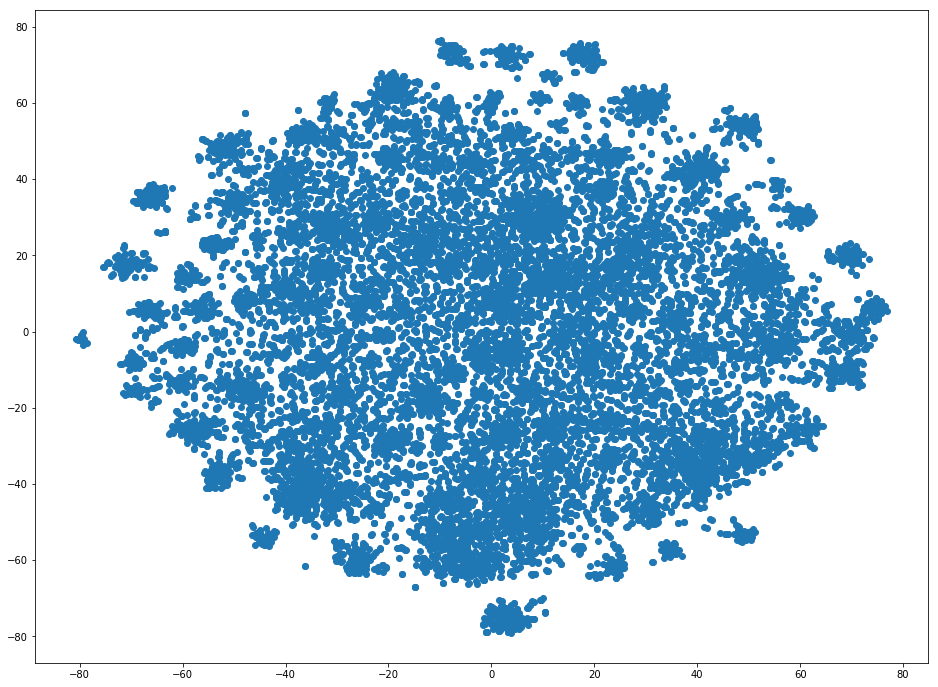

In [8]:
plt.figure(figsize=(16, 12))

tx, ty = tsne_embedded[:,0], tsne_embedded[:,1]
plt.scatter(tx, ty)
plt.show()

In [12]:
user_encoder = AutoEncoder(143, 12)
user_encoder.load_state_dict(torch.load('./trained_model/user_encoder_augmented.pth'))

In [13]:
with open('./datasets/user_vectors_tf_idf.json', 'r') as up:
    user_data = json.load(up)

In [14]:
embeded_vectors = []

for user_name, user_vec in user_data.items():
    user_embed = user_encoder.encoder(torch.Tensor(user_vec[:143]))
    embeded_vectors.append(user_embed.tolist())

In [15]:
user_embed = np.array(embeded_vectors)

In [16]:
tsne_embedded = t_sne.TSNE(n_components=2, verbose=1).fit_transform(user_embed)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 19000 samples in 0.020s...
[t-SNE] Computed neighbors for 19000 samples in 5.497s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19000
[t-SNE] Computed conditional probabilities for sample 2000 / 19000
[t-SNE] Computed conditional probabilities for sample 3000 / 19000
[t-SNE] Computed conditional probabilities for sample 4000 / 19000
[t-SNE] Computed conditional probabilities for sample 5000 / 19000
[t-SNE] Computed conditional probabilities for sample 6000 / 19000
[t-SNE] Computed conditional probabilities for sample 7000 / 19000
[t-SNE] Computed conditional probabilities for sample 8000 / 19000
[t-SNE] Computed conditional probabilities for sample 9000 / 19000
[t-SNE] Computed conditional probabilities for sample 10000 / 19000
[t-SNE] Computed conditional probabilities for sample 11000 / 19000
[t-SNE] Computed conditional probabilities for sample 12000 / 19000
[t-SNE] Computed conditional probabilities for sam

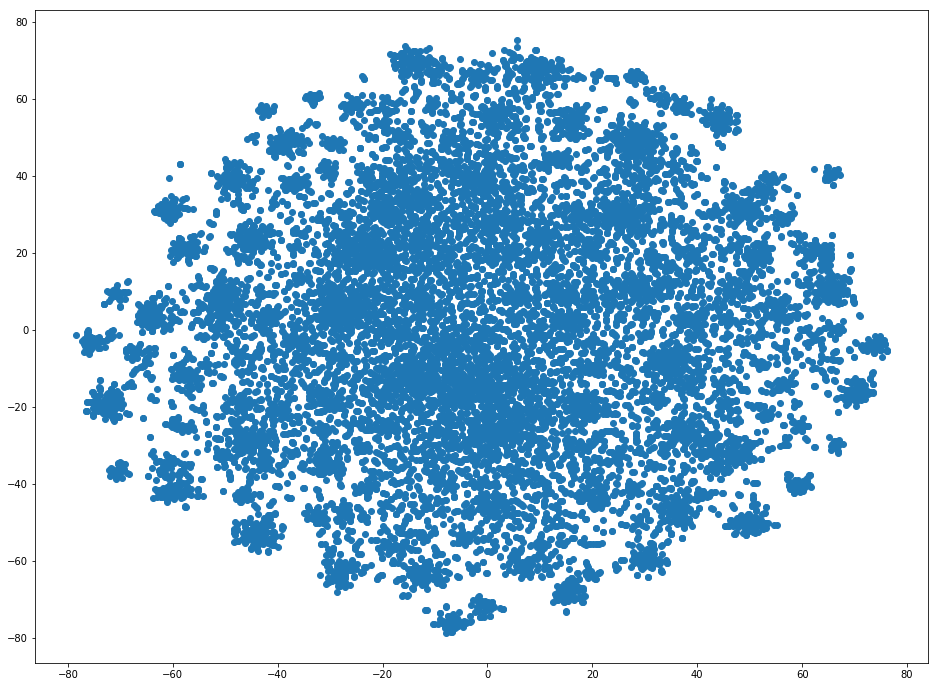

In [17]:
plt.figure(figsize=(16, 12))

tx, ty = tsne_embedded[:,0], tsne_embedded[:,1]
plt.scatter(tx, ty)
plt.show()

In [10]:
item_encoder = AutoEncoder(143, 10)
item_encoder.load_state_dict(torch.load('./trained_model/item_encoder.pth'))

with open('./datasets/item_vectors_tf_idf.json', 'r') as ip:
    item_data = json.load(ip)
    
item_embeded_vectors = []

for item_name, item_vec in item_data.items():
    item_embed = item_encoder.encoder(torch.Tensor(item_vec))
    item_embeded_vectors.append(item_embed.tolist())
    
item_embed = np.array(item_embeded_vectors)

item_tsne_embedded = t_sne.TSNE(n_components=2, verbose=1).fit_transform(item_embed)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 143 samples in 0.000s...
[t-SNE] Computed neighbors for 143 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 143 / 143
[t-SNE] Mean sigma: 0.033974
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.426289
[t-SNE] Error after 1000 iterations: 0.622668


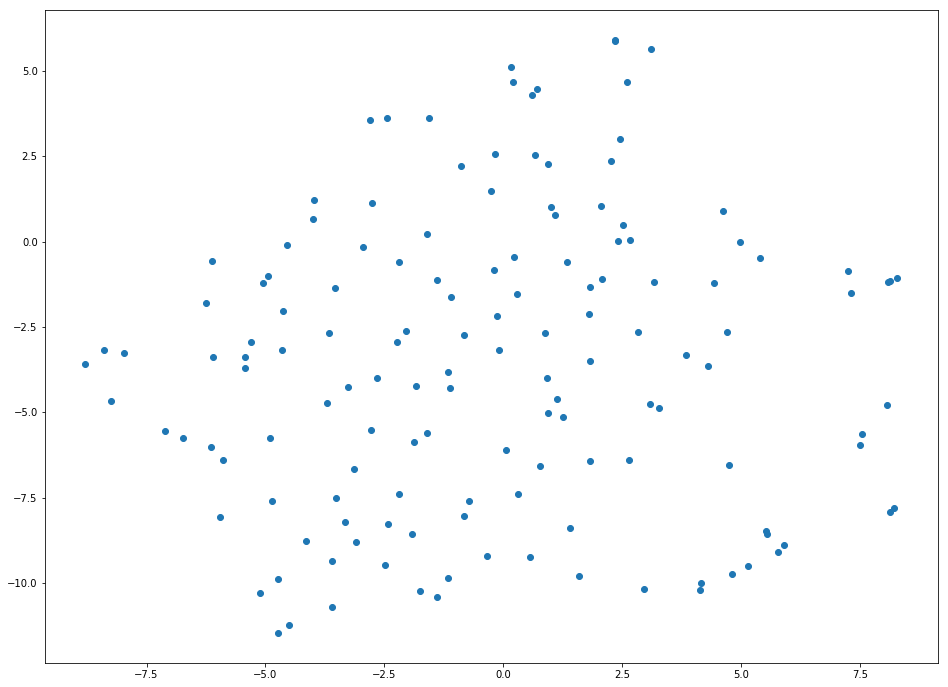

In [11]:
plt.figure(figsize=(16, 12))

item_tx, item_ty = item_tsne_embedded[:,0], item_tsne_embedded[:,1]
plt.scatter(item_tx, item_ty)
plt.show()